# Importando bibliotecas

In [1]:
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import  SMOTE
from collections import Counter
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree as sktree
import numpy as np

# Importando o dataset

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/rodrigoh/aprendizado-maquina/refs/heads/main/aula03/titanic.csv')
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,"211,3375",B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,"0,9167",1,2,113781,"151,5500",C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,"151,5500",C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,"151,5500",C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,"151,5500",C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


#Verificando os tipos das colunas

**Features**

* survival - Survival (0 = No; 1 = Yes)
* class - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
* name - Name
* sex - Sex
* age - Age
* sibsp - Number of Siblings/Spouses Aboard
* parch - Number of Parents/Children Aboard
* ticket - Ticket Number
* fare - Passenger Fare
* cabin - Cabin
* embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
* boat - Lifeboat (if survived)
* body - Body number (if did not survive and body was recovered)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   object 
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   object 
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(1), int64(4), object(9)
memory usage: 143.3+ KB


In [4]:
df.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

# Preenchendo dados faltantes

In [5]:
# Garante que Age é numérica (valores inválidos viram NaN)
df['age'] = pd.to_numeric(df['age'], errors='coerce')


# Calcular a mediana de idade por grupo (Sex + Pclass)
idade_media = df.groupby(['sex', 'pclass'])['age'].median()

# Preencher valores ausentes com a mediana do grupo
def preenchimento_idade(row):
    if pd.isnull(row['age']):
        return idade_media.loc[row['sex'], row['pclass']]
    else:
        return row['age']

df['age'] = df.apply(preenchimento_idade, axis=1)

# Ajustando a coluna sexo

In [6]:
df['sex'] = df['sex'].map({'male': 0, 'female': 1})

# Separando colunas

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   int64  
 4   age        1309 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   object 
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(2), int64(5), object(7)
memory usage: 143.3+ KB


In [8]:
X = df[['age','sex', 'pclass', 'parch', 'sibsp']]
y = df['survived']

# Seperando o dataset em treino e teste deixando 20% das instâncias para teste

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Balanceamento dos dados

In [10]:
# Aplicando ClusterCentroids
# sampling_strategy=0.7 → quer dizer que, no final, a classe minoritária terá 70% da quantidade da majoritária.
run = RandomUnderSampler(sampling_strategy=0.7, random_state=42)
X_run, y_run = run.fit_resample(X_train, y_train)

# Distribuição após ClusterCentroids
print("Depois do RandomUnderSampler:", Counter(y_run))

# Aplicando o SMOTE
smote = SMOTE(random_state=42)

# Aplicando o smote
X_train, y_train = smote.fit_resample(X_run, y_run)

# Distribuição após SMOTE
print("Depois do SMOTE:", Counter(y_train))

Depois do RandomUnderSampler: Counter({0: 545, 1: 382})
Depois do SMOTE: Counter({0: 545, 1: 545})


# Padronizando os dados

In [11]:
#Criando o scaler
scaler = StandardScaler()

#Ajustando os parâmetros e aplicando nos dados de treino
X_train_scaled = scaler.fit_transform(X_train)

#Aplicando o scaler nos dados de teste
X_test_scaled = scaler.transform(X_test)

# Treinando o modelo (com dados padronizados)

In [12]:
tree = DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=42)
tree.fit(X_train_scaled, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


# Realizando previsões  (com dados padronizados)

In [13]:
y_pred = tree.predict(X_test_scaled)

# Verificando as métricas  (com dados padronizados)

In [14]:
cm = confusion_matrix(y_test, y_pred)
print("Acurácia:", accuracy_score(y_test, y_pred))
print(cm)
print(classification_report(y_test, y_pred))

Acurácia: 0.7709923664122137
[[126  18]
 [ 42  76]]
              precision    recall  f1-score   support

           0       0.75      0.88      0.81       144
           1       0.81      0.64      0.72       118

    accuracy                           0.77       262
   macro avg       0.78      0.76      0.76       262
weighted avg       0.78      0.77      0.77       262



# Matriz de confusão  (com dados padronizados)

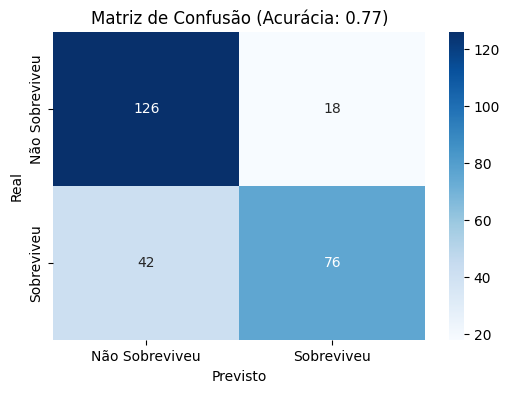

In [15]:
# Plot
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Não Sobreviveu', 'Sobreviveu'],
            yticklabels=['Não Sobreviveu', 'Sobreviveu'])
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title(f'Matriz de Confusão (Acurácia: {accuracy_score(y_test, y_pred):.2f})')
plt.show()

# Árvore de decisão

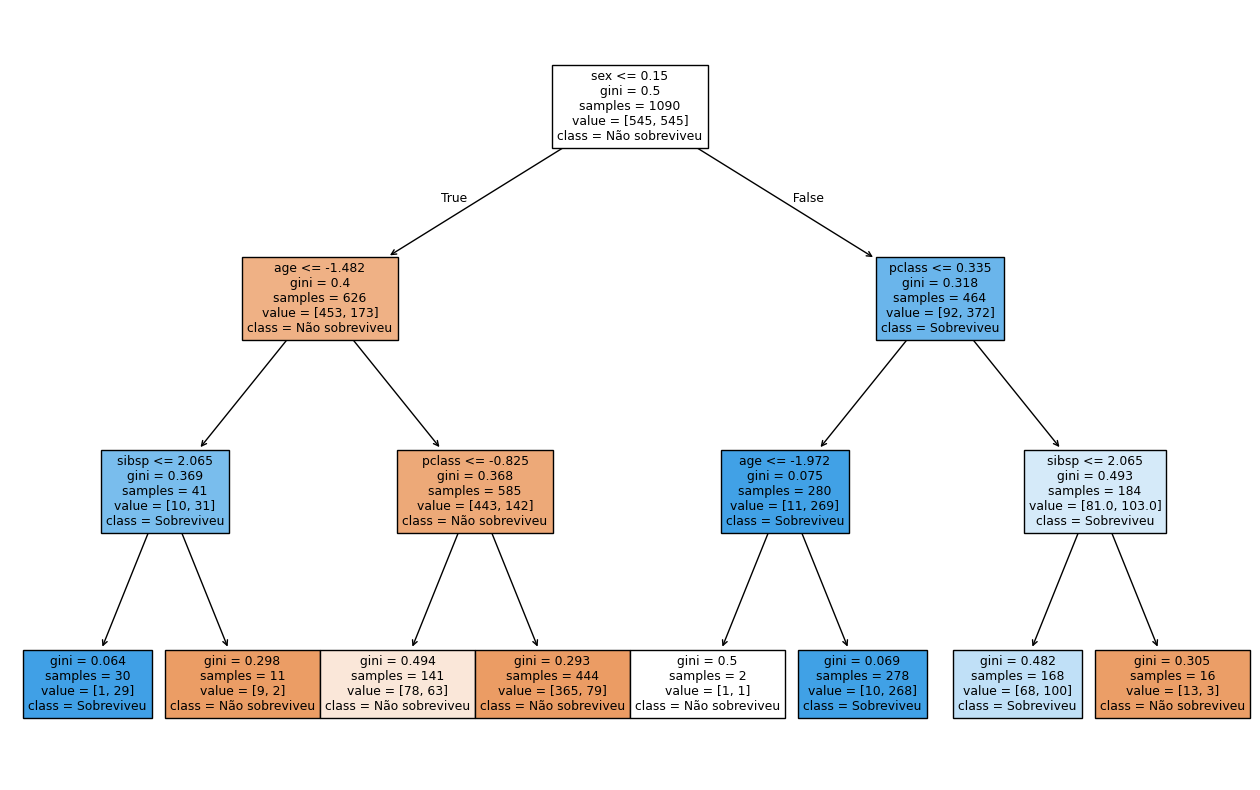

In [16]:
features_names = X.columns
plt.figure(figsize=(16,10))
sktree.plot_tree(tree, feature_names=features_names, class_names=['Não sobreviveu','Sobreviveu'], filled=True)
plt.show()